In [1]:
import sys
from ReST import ReST
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## CASE 1: MELANOMA SAMPLE with CSV data type

In [2]:
## Load the data with a CSV input type, index is the XxY coordinate, columns are the gene symbols
## This block generate:
### a CPM normalized expression data, 
### a observation data frame contains the X, Y coordinates,
### a var data frame contains the meta information of the genes
## The abovementioned three inputs will be used to generate a ReST object

df = pd.read_csv("test_data/raw.csv", index_col=0)
df.columns = [c.split()[0] for c in df.columns]
xs, ys = [],[]
for ind in df.index.tolist():
    xs.append(int(ind.split('x')[0]))
    ys.append(int(ind.split('x')[1]))
meta_df = pd.DataFrame({'array_col': xs, "array_row": ys}, index = df.index)
gene_df = pd.DataFrame({'gene': df.columns.tolist()}, index=df.columns)

In [3]:
## Data construction, QC, and preprocessing
rd = ReST(counts=df, coordinates=meta_df, gene_df=gene_df)
rd.preprocess(species='Human', hvg_prop=0.8, n_pcs=10, filter_spot=True)

Before QC: 293 observations and 16148 genes.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Filtering spots with less than 1500 UMIs.
After QC: 269 observations and 8137 genes.


MIST Data created in 0.69 seconds.


100%|██████████| 43/43 [00:07<00:00,  6.10it/s]


Epsilon 0.740 is selected in 7.33 seconds.


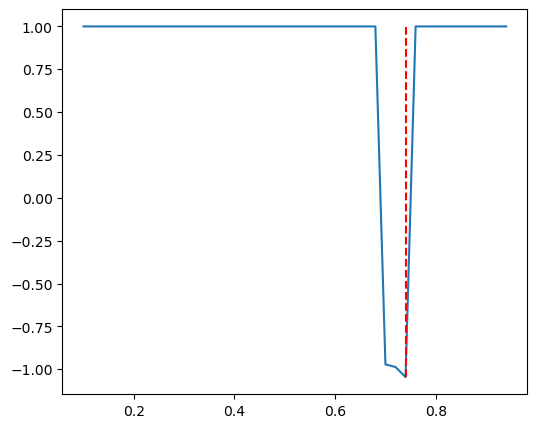

In [9]:
## Region extraction through parameter optimization and graph algorithms
rd.extract_regions(min_sim = 0.1, min_size=20, gap=0.02)

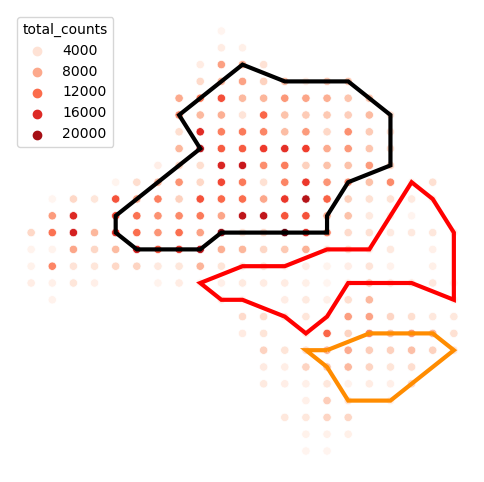

In [11]:
# Plot region boundaries
region_colors={'0':'black', '1':'red', '2':'darkorange'}
rd.assign_region_colors(region_colors)
rd.plot_region_boundaries()

100%|██████████| 3/3 [00:05<00:00,  1.84s/it]


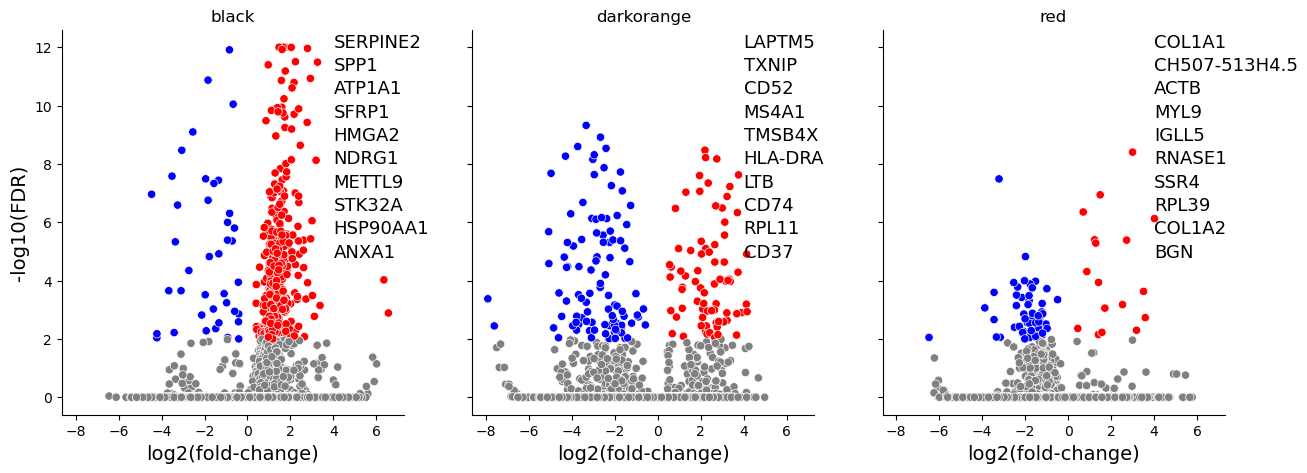

In [12]:
## Functional annotation of the regions
rd.extract_regional_markers(mode='all')
rd.plot_region_volcano()

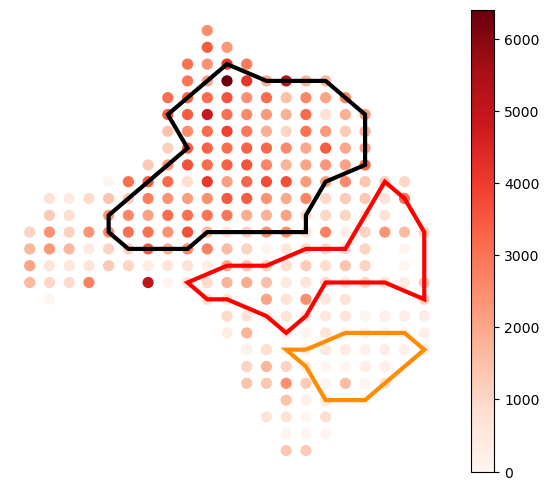

In [13]:
## Visualize gene expression heatmap with the boundaries
gene = 'SERPINE2'
rd.visualize_gene_expr(gene)

In [14]:
rd.runGSEA(mode='all', species='Human', gene_sets="GO_Biological_Process_2021")

Running GSEA on mode all for species Human.


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

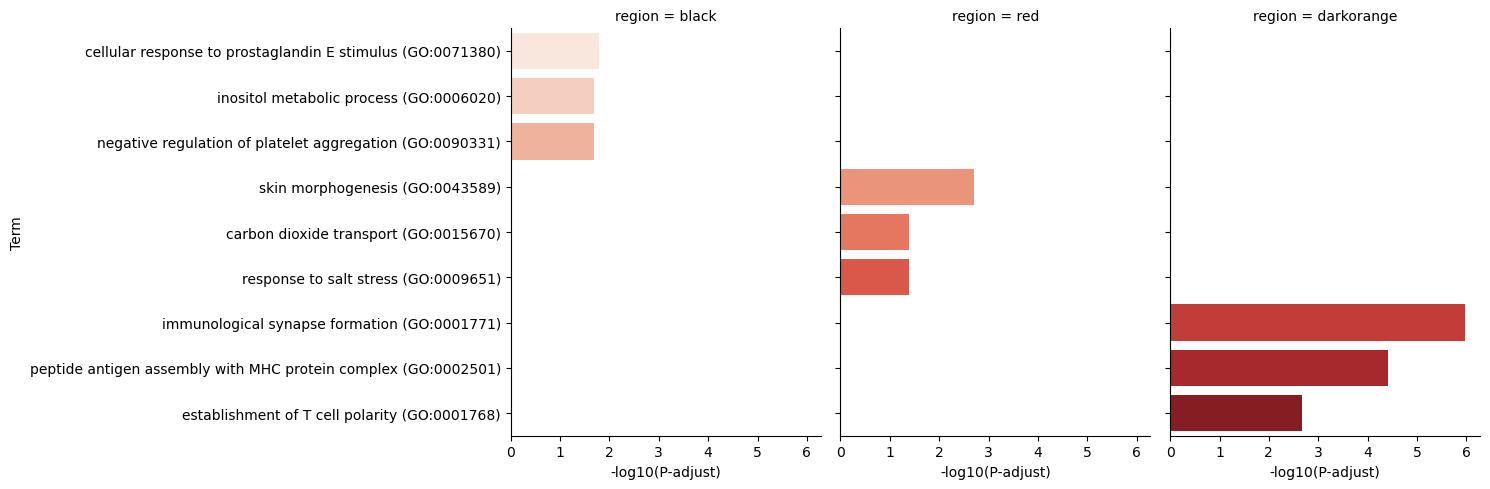

In [15]:
rd.plot_region_enrichment(top=3, flavor='default')

In [16]:
## Run imputation
imputed = rd.impute(ncores=1, nExperts=3)

In [20]:
before_impute_sparsity = np.sum(rd.adata.X.toarray() == 0) /  np.product(rd.adata.shape)
after_impute_sparsity = (imputed == 0).sum().sum() /  np.product(imputed.shape)
print(f"Before imputation sparsity = {(before_impute_sparsity * 100):.2f}%.")
print(f"After imputation sparsity = {(after_impute_sparsity * 100):.2f}%.")


Before imputation sparsity = 71.23%.
After imputation sparsity = 25.88%.
